### Proyecto práctico

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _Space Invaders_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, una solución óptima será alcanzada cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

   1) Implementar la red neuronal que se usará en la solución
    
   2) Implementar las distintas piezas de la solución DQN
    
   3) Justificar la respuesta en relación a los resultados obtenidos

IMPORTANTE:

- Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.

- Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).

- Necesitaréis instalar `gymnasium[atari,accept-rom-license]`


#### Importar librerías

In [1]:
!pip3 install keras-rl2


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [2]:
!pip3 install gymnasium[atari,accept-rom-license]
!pip3 install keras
!pip3 install tensorflow
!pip3 install keras-rl2


zsh:1: no matches found: gymnasium[atari,accept-rom-license]

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [3]:
!pip3 install tensorflow==2.3.1 gym keras-rl2==1.0.4 

zsh:1: no matches found: gym[atari]==0.18.0


In [17]:
import subprocess

# Execute the pip3 install command using subprocess
subprocess.call(['pip3', 'install', 'gym[atari]==0.18.0'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 941.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.6/540.6 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for atari_py


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [402 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-universal2-cpython-310
      creating build/lib.macosx-10.9-universal2-cpython-310/atari_py
      copying atari_py/__init__.py -> build/lib.macosx-10.9-universal2-cpython-310/atari_py
      copying atari_py/games.py -> build/lib.macosx-10.9-universal2-cpython-310/atari_py
      copying atari_py/ale_python_interface.py -> build/lib.macosx-10.9-universal2-cpython-310/atari_py
      copying atari_py/import_roms.py -> build/lib.macosx-10.9-universal2-cpython-310/atari_py
      creating build/lib.macosx-10.9-universal2-cpython-310/atari_py/ale_interface
      copying atari_py/ale_interface/md5.txt -> build/lib.macosx-10.9-universal2-cpython-310/atari_py/ale_interface
      copying atari_py/ale_c_wrapper.cpp -> build/lib.maco

  Running setup.py clean for Pillow


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [180 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-universal2-cpython-310
      creating build/lib.macosx-10.9-universal2-cpython-310/PIL
      copying src/PIL/MpoImagePlugin.py -> build/lib.macosx-10.9-universal2-cpython-310/PIL
      copying src/PIL/ImageMode.py -> build/lib.macosx-10.9-universal2-cpython-310/PIL
      copying src/PIL/PngImagePlugin.py -> build/lib.macosx-10.9-universal2-cpython-310/PIL
      copying src/PIL/XbmImagePlugin.py -> build/lib.macosx-10.9-universal2-cpython-310/PIL
      copying src/PIL/PcxImagePlugin.py -> build/lib.macosx-10.9-universal2-cpython-310/PIL
      copying src/PIL/SunImagePlugin.py -> build/lib.macosx-10.9-universal2-cpython-310/PIL
      copying src/PIL/ImageFile.py -> build/lib.macosx-10.9-universal2-cpython-310/PIL
      co

  Running setup.py clean for gym


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [599 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/gym
      copying gym/version.py -> build/lib/gym
      copying gym/error.py -> build/lib/gym
      copying gym/__init__.py -> build/lib/gym
      copying gym/core.py -> build/lib/gym
      copying gym/logger.py -> build/lib/gym
      creating build/lib/gym/wrappers
      copying gym/wrappers/test_rescale_action.py -> build/lib/gym/wrappers
      copying gym/wrappers/resize_observation.py -> build/lib/gym/wrappers
      copying gym/wrappers/test_time_aware_observation.py -> build/lib/gym/wrappers
      copying gym/wrappers/gray_scale_observation.py -> build/lib/gym/wrappers
      copying gym/wrappers/test_clip_action.py -> build/lib/gym/wrappers
      copying gym/wrappers/test_pixel_observation.py -> build/

  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492024 sha256=5bdf81603f9b58ae783b427941d2d0f194c4a8b1adca80bbadaa38418151fc5c
  Stored in directory: /Users/gabrieldiazireland/Library/Caches/pip/wheels/69/c0/ce/f2a18105d619f21239a048bcc58e98d8ce47ac824e0531f1a0
Successfully built future
Failed to build atari_py Pillow gym
  Attempting uninstall: Pillow
    Found existing installation: Pillow 10.1.0
    Uninstalling Pillow-10.1.0:
      Successfully uninstalled Pillow-10.1.0
  Running setup.py install for Pillow: started
  Running setup.py install for Pillow: finished with status 'error'
  Rolling back uninstall of Pillow
  Moving to /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/PIL/
   from /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/~IL
  Moving to /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/Pillow-10.1.0.dist-info/
   from /Library/Frameworks/Python.frame

  error: subprocess-exited-with-error
  
  × Running setup.py install for Pillow did not run successfully.
  │ exit code: 1
  ╰─> [184 lines of output]
      running install
      /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-universal2-cpython-310
      creating build/lib.macosx-10.9-universal2-cpython-310/PIL
      copying src/PIL/MpoImagePlugin.py -> build/lib.macosx-10.9-universal2-cpython-310/PIL
      copying src/PIL/ImageMode.py -> build/lib.macosx-10.9-universal2-cpython-310/PIL
      copying src/PIL/PngImagePlugin.py -> build/lib.macosx-10.9-universal2-cpython-310/PIL
      copying src/PIL/XbmImagePlugin.py -> build/lib.macosx-10.9-universal2-cpython-310/PIL
      copying src/P

1

In [4]:
import subprocess

# Execute the pip3 install command using subprocess
subprocess.call(['pip3', 'install', 'gymnasium[atari,accept-rom-license]'])


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


0

In [2]:
from PIL import Image
import numpy as np
import gymnasium as gym

import matplotlib.pyplot as plt
import torch

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from keras.optimizers import Adam
import keras.backend as K



In [4]:
# Necesario para arreglar error al importar el agente DQN
from keras import __version__
tf.keras.__version__ = __version__

from rl.agents import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

In [14]:
env = gym.make("CartPole-v1")
np.random.seed(123)
nb_actions = env.action_space.n
state, info = env.reset()

In [15]:
state.shape

(4,)

In [16]:
print(state)

[-0.03856692  0.03698852  0.03628767 -0.03753675]


In [5]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v4'
env = gym.make(env_name)

np.random.seed(123)
nb_actions = env.action_space.n
state, info = env.reset()

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [6]:
state.shape

(210, 160, 3)

In [13]:
print(state)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[80 89 22]
  [80 89 22]
  [80 89 22]
  ...
  [80 89 22]
  [80 89 22]
  [80 89 22]]

 [[80 89 22]
  [80 89 22]
  [80 89 22]
  ...
  [80 89 22]
  [80 89 22]
  [80 89 22]]

 [[80 89 22]
  [80 89 22]
  [80 89 22]
  ...
  [80 89 22]
  [80 89 22]
  [80 89 22]]]


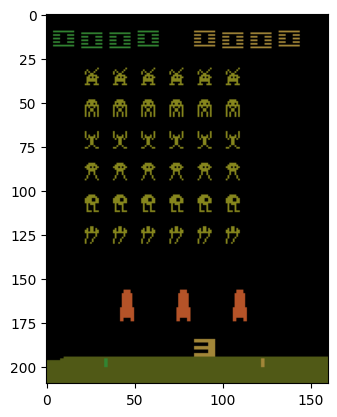

In [7]:
plt.imshow(state)

In [8]:
class AtariProcessor(object):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')
        

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)


# def process_observation(self, observation):
#     assert observation.ndim == 3  # (height, width, channel)
#     observation = observation.astype('float32')
#     observation = observation / 255.0  # Normalize pixel values to 0-1 range
#     return observation

## 1) Implementación de la red neuronal

In [9]:
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
model = Sequential()
model.add(Permute((2, 3, 1), input_shape=input_shape))
model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(Activation('relu'))
model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 activation (Activation)     (None, 20, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 activation_1 (Activation)   (None, 9, 9, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 activation_2 (Activation)   (None, 7, 7, 64)          0

## 2) Implementación de la solución DQN

In [10]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1, value_test=0.1,
                              nb_steps=2500000)
memory = SequentialMemory(limit=100000, window_length=WINDOW_LENGTH)

In [11]:
dqn = DQNAgent(
    model=model,
    policy=policy,
    nb_actions=nb_actions,
    memory=memory,
    gamma=0.99,
    batch_size=25,
    train_interval=1,
    memory_interval=1,
    target_model_update=1000,
    nb_steps_warmup=10000,
    enable_double_dqn=True
)
dqn.compile(Adam(learning_rate=0.00025), metrics=['mae'])

2023-12-02 18:59:14.098279: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2023-12-02 18:59:14.110560: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_2/kernel/Assign' id:226 op device:{requested: '', assigned: ''} def:{{{node dense_2/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_2/kernel, dense_2/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [12]:
weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
checkpoint_weights_filename = 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = 'dqn_{}_log.json'.format(env_name)

callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000)]
callbacks += [FileLogger(log_filename, interval=100)]



dqn.fit(env, callbacks=callbacks, nb_steps=3750000, verbose=2)

dqn.save_weights(weights_filename, overwrite=True)

Training for 3750000 steps ...


AttributeError: 'int' object has no attribute 'shape'

### Evaluación del modelo resultante

In [ ]:
# Testing part to calculate the mean reward
weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

## 3) Justificación de los parámetros seleccionados y de los resultados obtenidos

**Fuente principal utilizada:**
https://huggingface.co/learn/deep-rl-course/unit3/glossary

In [ ]:
class DQNNet(nn.Module):
    def __init__(self, state_dim, action_dim):
        super().__init__()

        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F



class DQNNet(nn.Module):
    def __init__(self, state_dim, action_dim):
        super().__init__()

        # Assuming the network has two convolutional layers, followed by fully connected layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(8, 10), stride=4)  # Modified kernel size to handle 210x160 input
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2)
        self.fc1 = nn.Linear(27648, 128)  # Adjusted output shape based on modified kernel size
        self.fc2 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 27648) # Modified view() operation to match adjusted output shape
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

INPUT_SHAPE = (210, 160)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v4'
env = gym.make(env_name,render_mode='human')

np.random.seed(123)
nb_actions = env.action_space.n
state, info = env.reset()

class ReplayMemory(object):
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, state, action, reward, next_state, done):
        if len(self.memory) < self.capacity:
            self.memory.append((state, action, reward, next_state, done))
        else:
            # When memory is full, start replacing samples randomly
            random_index = np.random.randint(0, self.capacity)
            self.memory[random_index] = (state, action, reward, next_state, done)

        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        samples = np.random.choice(len(self.memory), batch_size, replace=False) ## Ojo, quizá merece la pena aquí hacer un replace = False y sustituir con lo que haya.
        return [self.memory[i] for i in samples]

class DQNAgent(object):
    def __init__(self, state_dim, action_dim):
        self.state_dim = state_dim
        self.action_dim = action_dim

        self.net = DQNNet(state_dim, action_dim)
        self.target_net = DQNNet(state_dim, action_dim)
        self.target_net.load_state_dict(self.net.state_dict())

        self.optimizer = optim.Adam(self.net.parameters())
        self.loss_fn = nn.MSELoss()

        self.replay_memory = ReplayMemory(10000)

    def update(self, batch_size):
        if len(self.replay_memory.memory) < self.replay_memory.capacity:
            # Skip the update if the memory is not full yet
            pass
        else:

            memory_sampling = self.replay_memory.sample(batch_size)

            states = []
            actions = []
            rewards = []
            next_states = []
            dones = []

            for experience in memory_sampling:
                states.append(experience[0])
                actions.append(experience[1])
                rewards.append(experience[2])
                next_states.append(experience[3])
                dones.append(experience[4])

            states = torch.cat(states, dim=0) 
            next_states = torch.cat(next_states, dim=0) 

            accumulated_loss = 0
            
            i2 = 1
            states = torch.tensor(states[i2]).float().unsqueeze(0)
            actions = torch.tensor(actions[i2]).long()
            rewards = torch.tensor(rewards[i2]).float()
            next_states = torch.tensor(next_states[i2]).float().unsqueeze(0)
            dones = torch.tensor(dones[i2]).float()


            q_values = self.net(states)


            action_indices = torch.arange(6).long().unsqueeze(0)
            q_values = q_values.gather(1, action_indices)
            # q_values = q_values.gather(1, actions)

            


            next_q_values = self.target_net(next_states)
            max_next_q_values = torch.max(next_q_values, dim=1).values
            target_q_values = rewards + (0.99 * max_next_q_values) * (1 - dones)

            # Calculate loss for the current experience
            loss = self.loss_fn(q_values, target_q_values)

            # Accumulate loss

            accumulated_loss += loss

            print("Accumulated Loss", accumulated_loss)

            # Perform backpropagation using the accumulated loss
            self.optimizer.zero_grad()
            accumulated_loss.backward()
            self.optimizer.step()

    def act(self, state):

        
        
        gray_image = np.dot(state[..., :3], [0.2989, 0.5870, 0.1140])
        
        # Normalize pixel values (optional but often done in image processing)
        state = gray_image / 255.0


        
        
        state = torch.tensor(state).float().unsqueeze(0)
    

        

        q_values = self.net(state)
        action = torch.argmax(q_values, dim=1).item()

        return action
    

    

agent = DQNAgent(INPUT_SHAPE[0] * WINDOW_LENGTH, nb_actions)

env.render()

for episode in range(1000):
    state = env.reset()
    i=0
    state= state[0]

    i +=1

    for t in range(10000):
        
        print(i)
        
        action = agent.act(state)
        results_act = env.step(action)
        next_state = results_act[0]
        reward = results_act[1]
        done = results_act[2]
        _ = results_act[3]

        gray_image = np.dot(state[..., :3], [0.2989, 0.5870, 0.1140])
        state = gray_image / 255.0
        state = torch.tensor(state).float().unsqueeze(0)
        


        gray_image = np.dot(next_state[..., :3], [0.2989, 0.5870, 0.1140])
        next_state_store = gray_image / 255.0
        next_state_store = torch.tensor(state).float()
      
        
        if i > 2:
            agent.replay_memory.push(state, action, reward, next_state_store, done)
            agent.update(32)


        state = next_state
        
        
       

        if done:
            print("Game Over")
            break




A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


1


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/var/folders/vz/gbtwmbg50fj0wjbh42bpfh1m0000gn/T/ipykernel_95732/1595336340.py:167: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  next_state_store = torch.tensor(state).float()


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

/var/folders/vz/gbtwmbg50fj0wjbh42bpfh1m0000gn/T/ipykernel_95732/1595336340.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  states = torch.tensor(states[i2]).float().unsqueeze(0)
/var/folders/vz/gbtwmbg50fj0wjbh42bpfh1m0000gn/T/ipykernel_95732/1595336340.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  next_states = torch.tensor(next_states[i2]).float().unsqueeze(0)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same si

1054
tensor(4)
tensor([[-0.0662, -0.0034, -0.0047, -0.0664,  0.0008,  0.0184]],
       grad_fn=<AddmmBackward0>)
tensor([[-0.0662, -0.0034, -0.0047, -0.0664,  0.0008,  0.0184]],
       grad_fn=<GatherBackward0>)
1055
tensor(4)
tensor([[-0.0664,  0.0006, -0.0019, -0.0567,  0.0085,  0.0061]],
       grad_fn=<AddmmBackward0>)
tensor([[-0.0664,  0.0006, -0.0019, -0.0567,  0.0085,  0.0061]],
       grad_fn=<GatherBackward0>)
1056
tensor(4)
tensor([[-0.0556, -0.0044,  0.0039, -0.0412,  0.0145,  0.0137]],
       grad_fn=<AddmmBackward0>)
tensor([[-0.0556, -0.0044,  0.0039, -0.0412,  0.0145,  0.0137]],
       grad_fn=<GatherBackward0>)
1057
tensor(5)
tensor([[-0.0376, -0.0201,  0.0151, -0.0186,  0.0253,  0.0208]],
       grad_fn=<AddmmBackward0>)
tensor([[-0.0376, -0.0201,  0.0151, -0.0186,  0.0253,  0.0208]],
       grad_fn=<GatherBackward0>)
1058
tensor(4)
tensor([[-0.0084, -0.0292,  0.0167, -0.0032,  0.0283,  0.0315]],
       grad_fn=<AddmmBackward0>)
tensor([[-0.0084, -0.0292,  0.0167, -0.

: 